In [74]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.stattools import adfuller

In [78]:
passengers = pd.read_csv('international-airline-passengers.csv')
passengers = passengers.iloc[:-3,:]
passengers['Month']=pd.to_datetime(passengers['Month'],
                                   format='%Y-%m-%d')
passengers.head()

Month  \
0 1949-01-01   
1 1949-02-01   
2 1949-03-01   
3 1949-04-01   
4 1949-05-01   

   International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60  
0                                              112.0                               
1                                              118.0                               
2                                              132.0                               
3                                              129.0                               
4                                              121.0

In [79]:
passengers.rename(columns={passengers.columns[1]:'passenger_count'}, inplace=True)

In [80]:
passengers.set_index('Month', inplace=True)

In [81]:
passengers.head()

passenger_count
Month                      
1949-01-01            112.0
1949-02-01            118.0
1949-03-01            132.0
1949-04-01            129.0
1949-05-01            121.0

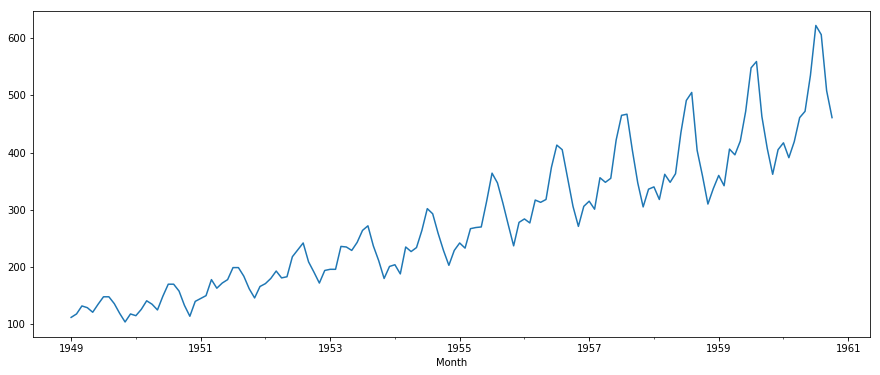

In [82]:
passengers['passenger_count'].plot()
plt.show()

In [83]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    fig, ax = plt.subplots()
    ax.plot(timeseries, color='blue',label='Original')
    ax.plot(rolmean, color='red', label='Rolling Mean')
    ax.plot(rolstd, color='black', label = 'Rolling Std')
    ax.legend(loc='best')
    ax.set_title('Rolling Mean & Standard Deviation')
    ax.set_xticks([])
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value {}'.format(key)] = value
    print(dfoutput)

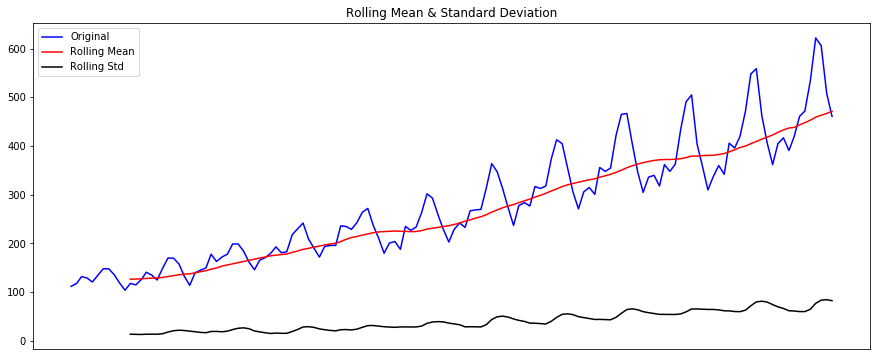

Results of Dickey-Fuller Test:
Test Statistic                   1.113971
p-value                          0.995334
#Lags Used                      13.000000
Number of Observations Used    128.000000
Critical Value 1%               -3.482501
Critical Value 5%               -2.884398
Critical Value 10%              -2.578960
dtype: float64


In [84]:
test_stationarity(passengers['passenger_count'])

Eliminating trend

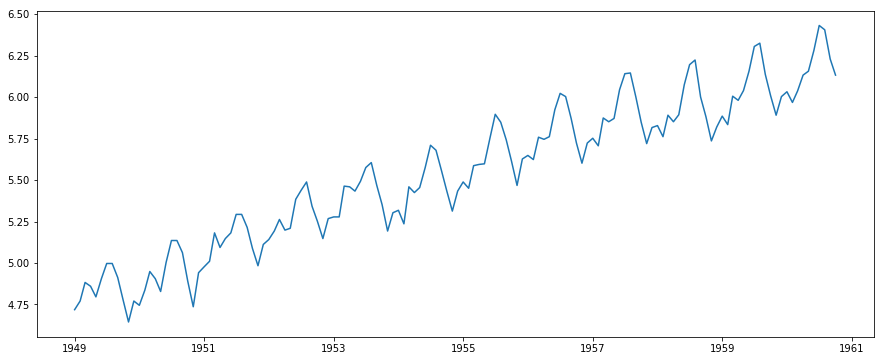

In [85]:
# 1

ps_log = np.log(passengers['passenger_count'])
plt.plot(ps_log)

plt.show()

In [86]:
rolling_pass = passengers['passenger_count'].rolling(window=12).mean()

In [90]:
ps_log_mov_avg_diff = passengers['passenger_count'] - rolling_pass
ps_log_mov_avg_diff.dropna(inplace=True)

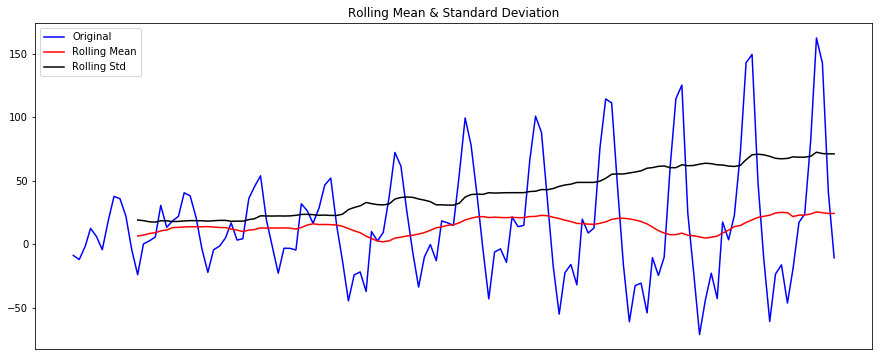

Results of Dickey-Fuller Test:
Test Statistic                  -2.891263
p-value                          0.046373
#Lags Used                      13.000000
Number of Observations Used    117.000000
Critical Value 1%               -3.487517
Critical Value 5%               -2.886578
Critical Value 10%              -2.580124
dtype: float64


In [91]:
test_stationarity(ps_log_mov_avg_diff)